In [1]:
clean_up = True # if True, remove all gams related files from working folder before starting
%run stdPackages.ipynb
os.chdir(main)
%run stdPlotting.ipynb
os.chdir(d['py'])
from mCGE import CGE_OPT as CGE

The file _gams_py_gdb0.gdx is still active and was not deleted.
The file _gams_py_gdb1.gdx is still active and was not deleted.
The file _gams_py_gdb2.gdx is still active and was not deleted.
The file _gams_py_gdb3.gdx is still active and was not deleted.
The file _gams_py_gdb4.gdx is still active and was not deleted.


# Shocks

*Load model:*

In [2]:
vName, t0 = 'vDPRC_noAdj', 2019
name = '_'.join([vName, str(t0), 'CGE','calibration'])
M = CGE.load(os.path.join(d['data'], name))
db = M.db.copy() # store baseline model for later

### 1. Identify optimal regulation:

*How does optimal regulation look like with labor atxes only:*

In [3]:
M.m['W'].endogenousPol = [('tauS', M.g('L', m = 'HH'))]
M.m['W'].initStuff() # re-initialize groups

C:\Users\sxj477\Anaconda3\envs\GAMS46\Lib\site-packages\pyDatabases\gpyDB\database.py:525: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  return ss.combine_first(s)


Update database and module structure:

In [4]:
M.db.mergeInternal()
M.opt = True
M.m['W'].active = True

Solve:

In [5]:
opt1 = M.solve(state='B')

Check it out:

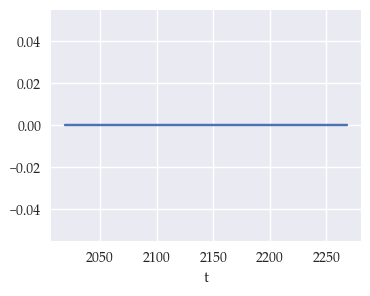

In [6]:
opt1('tauS').xs(('HH','L'),level=['s','n']).plot(figsize=(4,3));

Adjust and allow for production taxes as well:

In [7]:
instruments = ('or', [M.g('output', m = 'P'), M.g('L', m = 'HH')]) 
fullCondition = ('and', [instruments, M.g('txE')])
M.m['W'].endogenousPol = [('tauS', fullCondition)] # everything all at once
M.m['W'].initStuff() # re-initialize groups
M.db.mergeInternal();

New test:

In [8]:
opt2 = M.solve(state = 'B')

Check it out:

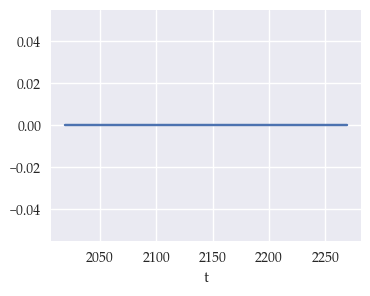

In [9]:
opt2('tauS').xs(('HH','L'),level=['s','n']).plot(figsize=(4,3));

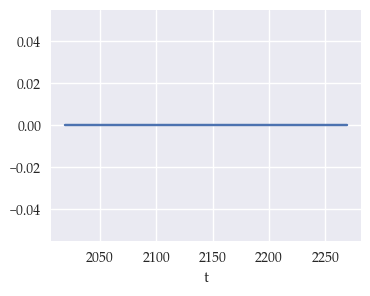

In [10]:
opt2('tauS').xs(('DomProdSec','DomProdSec'),level=['s','n']).plot(figsize=(4,3));

*Try to adjust the initial level of capital and then optimize using taxes:*

In [11]:
M.db.aom(adj.rc_pd(M.db('qD'), ('and', [M.g('t0'), M.g('dur_p')])) * 0.9, name = 'qD')
M.m['W'].endogenousPol = [('tauS', M.g('L', m = 'HH'))]
M.m['W'].initStuff() # re-initialize groups
M.db.mergeInternal()

Test:

In [12]:
opt3 = M.solve(state='B')

Check taxes:

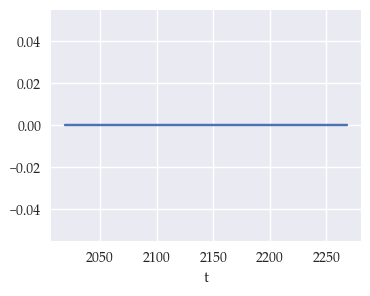

In [13]:
opt3('tauS').xs(('HH','L'),level=['s','n']).plot(figsize=(4,3));

Same again, but with more tax instruments:

In [14]:
M.m['W'].endogenousPol = [('tauS', fullCondition)] 
M.m['W'].initStuff() # re-initialize groups
M.db.mergeInternal()

Solve:

In [15]:
opt4 = M.solve(state = 'B')

Check it out (almost no taxes):

In [16]:
abs(opt4('tauS')).max()

1.765228040762907e-06

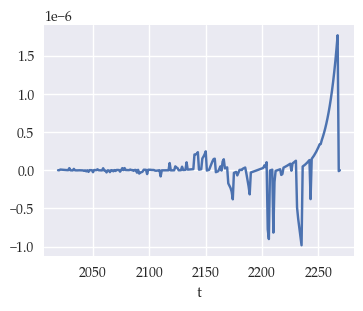

In [17]:
opt4('tauS').xs(('HH','L'),level=['s','n']).plot(figsize=(4,3));

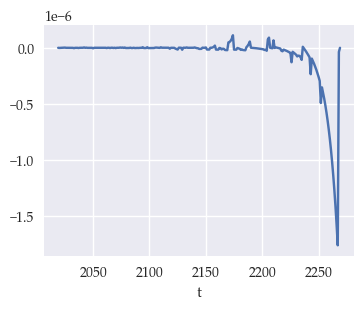

In [18]:
opt4('tauS').xs(('DomProdSec','DomProdSec'),level=['s','n']).plot(figsize=(4,3));